In [1]:
from Utils.Solver import *
from Utils.Signals import *

In [2]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.5, 0.5, 0.25, 1.75])  # Example signal scores
start_date ='2021-01-15'
end_date ='2022-01-15'

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## Signals 

In [3]:
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  5 of 5 completed


In [4]:
# Calculate the RSI signal scores
signal_scores = calculate_rsi_signal(data, tickers, date='2022-12-23', period=14)
print(signal_scores)

[['AAPL', np.float64(35.69463328949174)], ['MSFT', np.float64(44.14049948913393)], ['TSLA', np.float64(19.819923419876353)], ['AMZN', np.float64(38.02756082127925)], ['GOOG', np.float64(40.44857947106433)]]


In [5]:
scores = [score[1] for score in signal_scores]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[35.69463329 44.14049949 19.81992342 38.02756082 40.44857947]


     pcost       dcost       gap    pres   dres
 0: -1.2478e-01 -1.1479e+00  1e+00  0e+00  3e+00
 1: -1.2557e-01 -1.5230e-01  3e-02  9e-17  7e-02
 2: -1.2688e-01 -1.2801e-01  1e-03  1e-16  1e-03
 3: -1.2692e-01 -1.2694e-01  2e-05  1e-16  1e-05
 4: -1.2692e-01 -1.2692e-01  2e-07  1e-16  1e-07
 5: -1.2692e-01 -1.2692e-01  2e-09  1e-16  1e-09
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.20047993587702834), 'MSFT': np.float64(0.25974711037171455), 'TSLA': np.float64(0.08908236528224053), 'AMZN': np.float64(0.21685078748623388), 'GOOG': np.float64(0.2338398009827827)}
Final Portfolio Weights: [0.20047994 0.25974711 0.08908237 0.21685079 0.2338398 ]


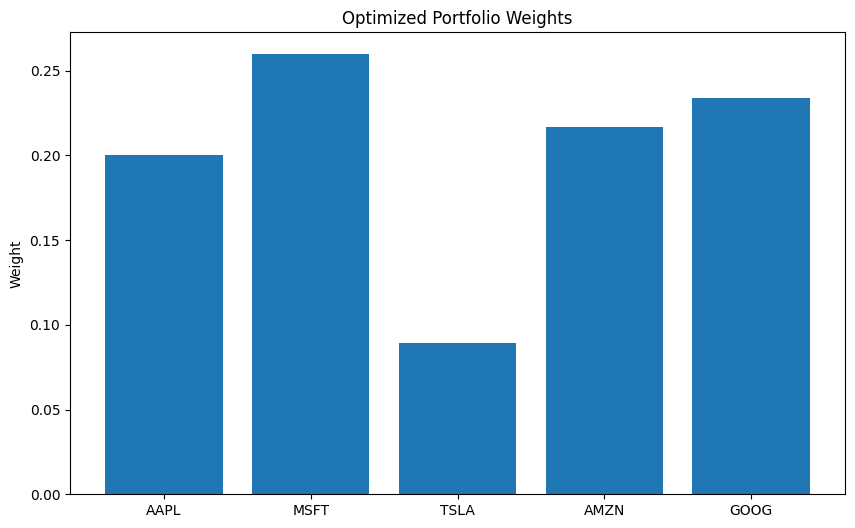

In [6]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

Total Portfolio Return: 147.66%
Annualized Portfolio Return: 147.66%


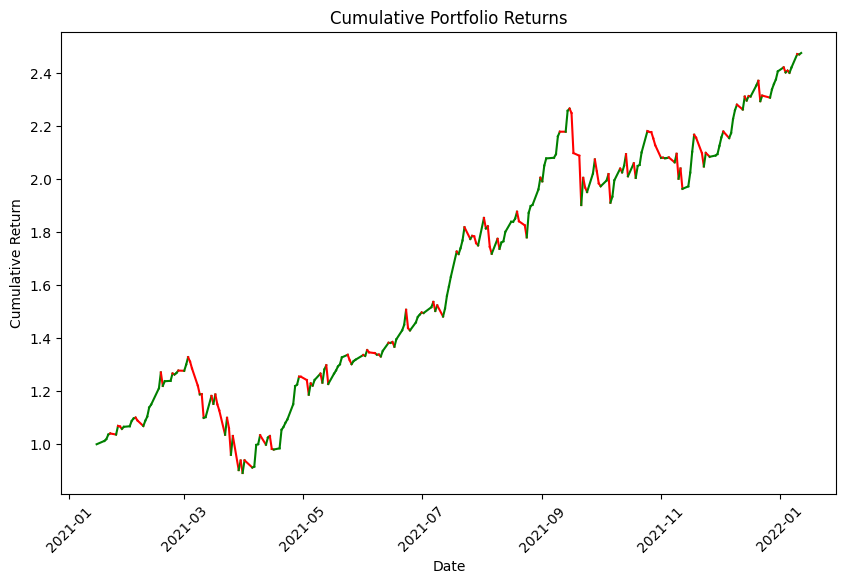

In [ ]:
# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Step 2: Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)

# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

In [8]:
# Example usage
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

# Calculate MACD for a specific date (e.g., '2021-01-15')
macd_signal = calculate_macd_signal(data, tickers, '2021-01-15')

# Print the resulting signal scores
print(macd_signal)


[*********************100%***********************]  5 of 5 completed

[['AAPL', np.float64(-0.8174504729996421)], ['MSFT', np.float64(-0.9849141279813194)], ['TSLA', np.float64(1.8872193344183685)], ['AMZN', np.float64(-0.6475118760441482)], ['GOOG', np.float64(-0.1266945431607725)]]


In [9]:
scores = [score[1] for score in macd_signal]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[-0.81745047 -0.98491413  1.88721933 -0.64751188 -0.12669454]


     pcost       dcost       gap    pres   dres
 0: -5.1576e+00 -3.2420e+00  2e+01  5e+00  1e+00
 1: -9.9484e-01 -1.9725e+00  1e+00  9e-03  2e-03
 2: -1.0944e+00 -1.1813e+00  9e-02  7e-04  2e-04
 3: -1.1233e+00 -1.1306e+00  7e-03  2e-05  4e-06
 4: -1.1260e+00 -1.1268e+00  8e-04  2e-16  6e-16
 5: -1.1262e+00 -1.1262e+00  7e-05  1e-16  3e-16
 6: -1.1262e+00 -1.1262e+00  9e-07  2e-16  6e-17
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.33481568035172277), 'MSFT': np.float64(0.6384771639617004), 'TSLA': np.float64(3.0399055553934475e-09), 'AMZN': np.float64(0.02670713734945482), 'GOOG': np.float64(1.52972164483222e-08)}
Final Portfolio Weights: [3.34815680e-01 6.38477164e-01 3.03990556e-09 2.67071373e-02
 1.52972164e-08]


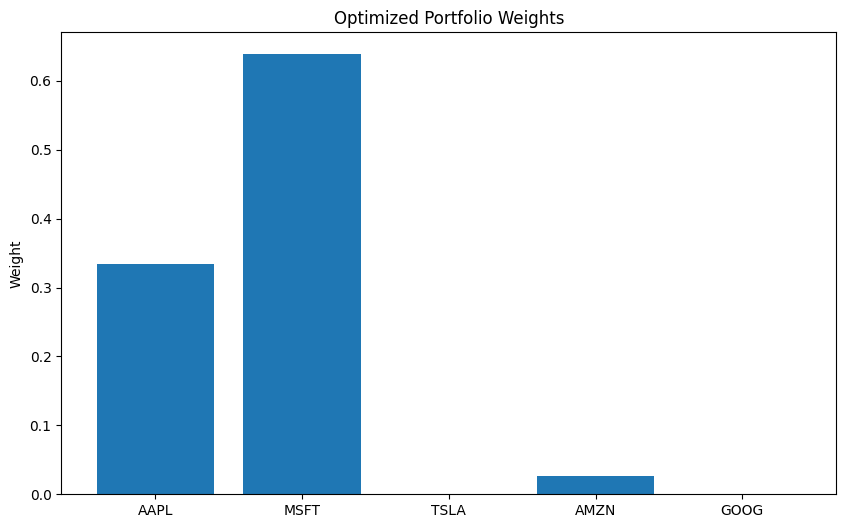

In [10]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

Total Portfolio Return: 76.57%
Annualized Portfolio Return: 76.57%


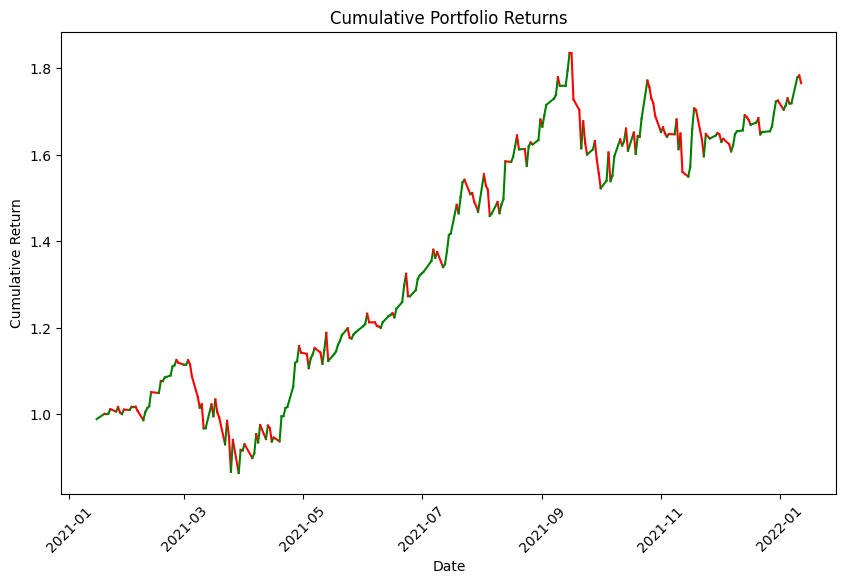

In [11]:
# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Step 2: Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)

# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

In [21]:
def calculate_sma_signal(data, tickers, date):
    """
    Calculate the SMA crossover signal for each stock in the portfolio on a specific date
    and return a signal score for each company.
    
    Parameters:
    - data: A DataFrame containing the 'Close' prices for each stock (tickers as columns).
    - tickers: List of stock tickers to calculate SMA crossover for.
    - date: The date (as a string in 'YYYY-MM-DD' format) to get the SMA crossover for.
    
    Returns:
    - A list of signal scores for each stock, corresponding to the tickers.
    """
    # Convert the date to a pandas datetime object for comparison
    date = pd.to_datetime(date)
    
    # Initialize an empty list to hold the signal scores
    signal_scores = []

    # Loop through each stock (ticker) in the data DataFrame
    for ticker in tickers:
        # Get the closing prices for the ticker
        close_prices = data['Close'][ticker]
        
        # Calculate the 50-period and 200-period Simple Moving Averages (SMA)
        sma_50 = ta.SMA(close_prices, timeperiod=50)
        sma_200 = ta.SMA(close_prices, timeperiod=200)
        
        print("sma_50 : ")
        print(sma_50.dropna())

        print("sma_200 : ")
        print(sma_200.dropna())

        # Check if the date is within the available data range
        if date in sma_50.index and date in sma_200.index:
            # Calculate the difference between the 50-period and 200-period SMAs
            sma_diff = sma_50.loc[date] - sma_200.loc[date]
            
            # Generate the score based on the SMA difference
            # Positive score for Golden Cross, negative score for Death Cross, larger the difference, larger the score
            signal_scores.append([ticker, sma_diff])  # Score is just the difference between SMAs
        else:
            # Handle the case when the date is not available in the data range
            signal_scores.append([ticker, np.nan])
    
    return signal_scores

In [ ]:
# Calculate SMA crossover signal for a specific date (e.g., '2021-01-15')
sma_signal = calculate_sma_signal(data, tickers, '2025-03-13')

# Print the resulting signal scores
print(sma_signal)

sma_50 : 
Date
2020-03-13     74.122981
2020-03-16     73.844246
2020-03-17     73.631340
2020-03-18     73.376914
2020-03-19     73.120143
                 ...    
2022-12-23    142.403255
2022-12-27    142.242705
2022-12-28    141.923732
2022-12-29    141.648888
2022-12-30    141.378201
Length: 707, dtype: float64
sma_200 : 
Date
2020-10-15     86.176185
2020-10-16     86.392886
2020-10-19     86.598301
2020-10-20     86.808305
2020-10-21     87.016896
                 ...    
2022-12-23    150.023297
2022-12-27    149.904660
2022-12-28    149.786526
2022-12-29    149.664042
2022-12-30    149.520999
Length: 557, dtype: float64
sma_50 : 
Date
2020-03-13    161.256415
2020-03-16    160.782374
2020-03-17    160.559965
2020-03-18    160.211613
2020-03-19    159.935165
                 ...    
2022-12-23    235.989101
2022-12-27    236.166671
2022-12-28    236.120866
2022-12-29    236.183318
2022-12-30    236.261960
Length: 707, dtype: float64
sma_200 : 
Date
2020-10-15    179.449974
2020

In [31]:
scores = [score[1] for score in sma_signal]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[nan nan nan nan nan]


In [32]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan


ValueError: domain error